In [2]:
import torch
import numpy as np
import os
from kvae_model import KVAEModel
from kvae import KVAE
from tqdm import tqdm
import pickle
import matplotlib.pyplot as plt

In [8]:
batch_size = 80
train_dataset, val_dataset =  load_bouncing_ball("bouncing_ball_data", "box")
train_dataset = train_dataset[np.random.choice(5000, 800)]
val_dataset = val_dataset[np.random.choice(1000, 400)]
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle = False, num_workers = 6)
val_dataloader   = torch.utils.data.DataLoader(val_dataset,   batch_size=batch_size, shuffle = False, num_workers = 6)

In [10]:
model = KVAEModel(x_dim = 32 * 32, 
             a_dim = 32,
             z_dim = 16, 
             dense_x_a = [256,128],
             dense_a_x = [128,256],
             x_2d=True,

             init_kf_mat = 0.05,
             noise_transition = 0.08,
             noise_emission = 0.03,
             init_cov = 20,

             K = 10,
             dim_RNN_alpha = 50,
             num_RNN_alpha = 1,
             dropout_p = 0,
             scale_reconstruction = 1,
             device='cpu').to('cpu')
model.build()

('A', Parameter containing:
tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        ...,

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0.,

In [12]:
kvae = KVAE(model=model,
            lr = 3e-3,#3e-6,
            lr_tot = 1e-3,#1e-6,
            epochs = 10,
            batch_size = batch_size,
            early_stop_patience = 20,
            save_frequency = 10,
            only_vae_epochs = 3,
            kf_update_epochs = 2,
            save_dir = "results")

In [8]:
# TODO: difference between forward and forward_vae?

('A', Parameter containing:
tensor([[[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0., 0.],
         [0., 0., 0.,  ..., 0., 1., 0.],
         [0., 0., 0.,  ..., 0., 0., 1.]],

        ...,

        [[1., 0., 0.,  ..., 0., 0., 0.],
         [0., 1., 0.,  ..., 0., 0., 0.],
         [0., 0., 1.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 1., 0.,

10it [00:10,  1.07s/it]
5it [00:01,  3.07it/s]


yay!
Training loss -3.1586523056030273 Validation loss -23.257054443359376
only vae...


10it [00:09,  1.05it/s]
5it [00:01,  3.13it/s]


yay!
Training loss -28.36717727661133 Validation loss -32.742413940429685
only vae...


10it [00:09,  1.06it/s]
5it [00:01,  3.25it/s]


yay!
Training loss -32.62704162597656 Validation loss -33.935776977539064
vae + kf...


10it [00:10,  1.00s/it]
5it [00:01,  2.83it/s]


Training loss -33.05788543701172 Validation loss -30.612090454101562
vae + kf...


10it [00:09,  1.11it/s]
5it [00:01,  3.25it/s]


Training loss -30.604740295410156 Validation loss -29.328719482421874
all...


10it [00:09,  1.10it/s]
5it [00:01,  3.19it/s]


Training loss -29.718880920410157 Validation loss -29.396651611328124
all...


10it [00:08,  1.12it/s]
5it [00:01,  2.77it/s]


Training loss -29.66496337890625 Validation loss -29.378226318359374
all...


10it [00:09,  1.11it/s]
5it [00:01,  2.77it/s]


Training loss -29.69298126220703 Validation loss -29.379577026367187
all...


10it [00:09,  1.03it/s]
5it [00:01,  3.07it/s]


Training loss -29.696949462890625 Validation loss -29.309982299804688
all...


10it [00:10,  1.02s/it]
5it [00:01,  3.28it/s]


Training loss -29.705748901367187 Validation loss -29.270011596679687


<Figure size 432x288 with 0 Axes>

<Figure size 576x432 with 0 Axes>

<Figure size 576x432 with 0 Axes>

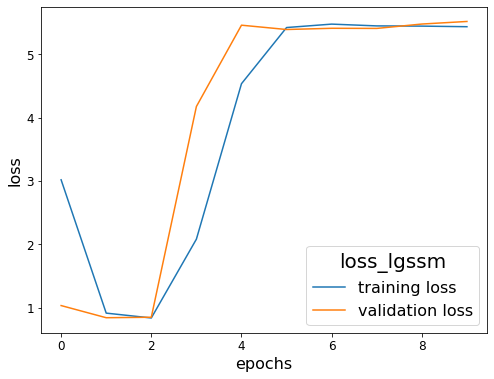

In [9]:
kvae.train(train_dataloader, val_dataloader)

In [ ]:
export_vid